Repurposing A4 for group project - working out ideas

From A4:
    - 

In [5]:
#import libraries
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

In [29]:
us_dfs = [pd.read_csv('./A4_TRI_Data/TRI_%d_US_CLEAN.csv' % x).drop('Unnamed: 0', axis=1) for x in range(1987,2017)]

/Users/jfd/miniconda3/envs/py27/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [39]:
dfdict = {x['YEAR'][0]:x for x in us_dfs}

In [58]:
dfdict[2016].sort_values('INDUSTRY_SECTOR')

,YEAR,FACILITY_NAME,FEDERAL_FACILITY,PARENT_COMPANY_NAME,INDUSTRY_SECTOR,ZIP,STATE,CITY,COUNTY,LATITUDE,...,CHEMICAL,UNIT_OF_MEASURE,CARCINOGEN,CAA_CHEMICAL,TOTAL_RELEASES,ON_SITE_RELEASE_TOTAL,OFF_SITE_RELEASE_TOTAL,OFF_SITE_RECYCLED_TOTAL,ON_SITE_RECYCLED_TOTAL,ONE_TIME_RELEASES
54211,2016,SHOWA BEST GLOVE INC,NO,SHOWA BEST GLOVE INC,Apparel,30731,GA,MENLO,CHATTOOGA,34.486186,...,ZINC COMPOUNDS,Pounds,NO,NO,2349.000000,0.000000,2348.50000,0.0,0.0,0.0
1883,2016,SHOWA BEST GLOVE INC,NO,SHOWA BEST GLOVE INC,Apparel,30731,GA,MENLO,CHATTOOGA,34.486186,...,XYLENE (MIXED ISOMERS),Pounds,NO,YES,13065.000000,13065.000000,0.00000,0.0,0.0,0.0
19014,2016,AMERICAN CRAFT BREWERY LLC,NO,NaN,Beverages,45214,OH,CINCINNATI,HAMILTON,39.114062,...,NITRATE COMPOUNDS,Pounds,NO,NO,0.000000,0.000000,0.00000,0.0,0.0,0.0
6337,2016,ANHEUSER-BUSCH LLC,NO,ANHEUSER-BUSCH INBEV,Beverages,63118,MO,SAINT LOUIS,ST LOUIS (CITY),38.596892,...,HYDROGEN SULFIDE,Pounds,NO,YES,2141.000000,2141.000000,0.00000,0.0,0.0,0.0
28789,2016,MILLERCOORS LLC-MILWAUKEE BREWERY,NO,MILLERCOORS LLC,Beverages,53208,WI,MILWAUKEE,MILWAUKEE,43.042120,...,CHLORINE,Pounds,NO,YES,0.000000,0.000000,0.00000,0.0,0.0,0.0
50985,2016,GOLDEN TRIANGLE ENERGY LLC,NO,GOLDEN TRIANGLE ENERGY LLC,Beverages,64437,MO,CRAIG,HOLT,40.189250,...,N-HEXANE,Pounds,NO,YES,1669.000000,1669.000000,0.00000,0.0,0.0,0.0
42786,2016,ANHEUSER-BUSCH LLC,NO,ANHEUSER-BUSCH INBEV,Beverages,77029,TX,HOUSTON,HARRIS,29.774444,...,DIOXIN AND DIOXIN-LIKE COMPOUNDS,Grams,NO,YES,0.170442,0.170442,0.00000,0.0,0.0,0.0
36431,2016,MILLERCOORS LLC - TRENTON BREWERY,NO,MILLERCOORS LLC,Beverages,45067,OH,TRENTON,BUTLER,39.452410,...,NITRATE COMPOUNDS,Pounds,NO,NO,127755.000000,127755.000000,0.00000,0.0,0.0,0.0
21239,2016,MATT BREWERY CO INC,NO,NaN,Beverages,13502,NY,UTICA,ONEIDA,43.103430,...,NITRIC ACID,Pounds,NO,NO,12.000000,12.000000,0.00000,0.0,0.0,0.0
34456,2016,ANHEUSER-BUSCH LLC,NO,ANHEUSER-BUSCH INBEV,Beverages,63118,MO,SAINT LOUIS,ST LOUIS (CITY),38.596892,...,NITRIC ACID,Pounds,NO,NO,0.000000,0.000000,0.00000,0.0,0.0,0.0


--------------------------------------

In [41]:
origLen = len(dfdict[2006])
stdDevs = 3
outliers = us2016[np.abs(dfdict[2006].TOTAL_RELEASES-dfdict[2006].TOTAL_RELEASES.mean())>=(stdDevs*dfdict[2006].TOTAL_RELEASES.std())]
dfdict[2006] = dfdict[2006][np.abs(dfdict[2006].TOTAL_RELEASES-dfdict[2006].TOTAL_RELEASES.mean())<=(stdDevs*dfdict[2006].TOTAL_RELEASES.std())]
trimmedLen = len(dfdict[2006])

/Users/jfd/miniconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
print '%.4f' % (len(outliers)/float(origLen))
print '%d values > %.3f standard deviations from the mean.' % ((origLen - trimmedLen),stdDevs)

0.0010
104 values > 3.000 standard deviations from the mean.


In [57]:
outlierSum = outliers['TOTAL_RELEASES'].sum()
sansOutlierSum = us_df_dict[2006]['TOTAL_RELEASES'].sum()

totalReleases2016 = outlierSum + sansOutlierSum

print 'Outliers accounted for %%%.2f of total' % (100*outlierSum/float(totalReleases2016))
print 'Rest accounted for %%%.2f of total' % (100*sansOutlierSum/float(totalReleases2016))

Outliers accounted for %0.04 of total
Rest accounted for %99.96 of total


In [52]:
def basicStatsSummary(startYear, endYear, dfdict):
    year_df_array = []
    
    for year in range(startYear, endYear+1):
        year_df_array.append({'year': year, 'df': dfdict[year][dfdict[year][]'IND'.TOTAL_RELEASES})
    
    for i in range(len(year_df_array)):
        year = year_df_array[i]['year']
        year_df_releases = year_df_array[i]['df']
        year_df_array[i]['total'] = year_df_releases.sum()
        year_df_array[i]['mean'] = year_df_releases.mean()
        year_df_array[i]['median'] = year_df_releases.median()

        
    return year_df_array
   
#apply previous methods to all years 1987-2016 and return so we can look at changes in stats over the period
year_df_objs = basicStatsSummary(1987,2016,dfdict)

In [53]:
yearlist = [year_df_objs[i]['year'] for i in range(len(year_df_objs))]
totals = [year_df_objs[i]['total'] for i in range(len(year_df_objs))] 
means = [year_df_objs[i]['mean'] for i in range(len(year_df_objs))] 
medians = [year_df_objs[i]['median'] for i in range(len(year_df_objs))]

summary = pd.DataFrame({
    'Year': yearlist,
    'Total': totals,
    'Mean': means,
    'Median': medians
})

In [54]:
def plotSummaryAttr(col):
    summary[col].plot(kind='kde', title=('Distribution of %s 1987-2016' % col), xlim=(summary[col].min(),summary[col].max()))
    ymax = max(plt.gca().get_ylim())
    plt.vlines(summary[col].mean(),
               ymin=0, 
               ymax=ymax,
               linewidth=2.0)

    plt.vlines(summary[col].median(),
               ymin=0, 
               ymax=ymax,
               linewidth=2.0,
               color='red')
    
    plt.gca().set_ylim(0)
    plt.show()

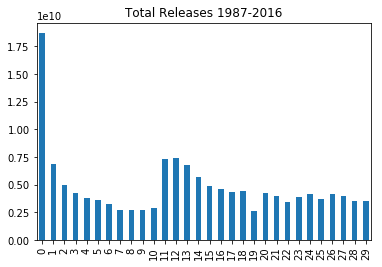

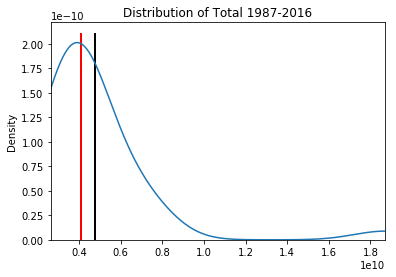

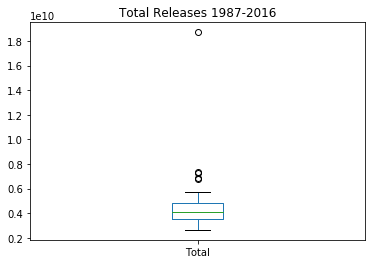

In [55]:
summary['Total'].plot(kind='bar', title='Total Releases 1987-2016')
plt.show()
plotSummaryAttr('Total')
summary['Total'].plot(kind='box', title='Total Releases 1987-2016')
plt.show()